In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [2]:
df = pd.read_csv('hotel_for_EDA.csv')

In [3]:
df

,Hotel,IsCanceled,LeadTime,ArrivalDate,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,No Deposit,0,0,0,Transient,103.529882,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,No Deposit,0,0,0,Transient,103.529882,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,No Deposit,0,0,0,Transient,75.000000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,No Deposit,304,0,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,No Deposit,240,0,0,Transient,98.000000,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,August,35,30,2,5,...,No Deposit,394,0,0,Transient,96.140000,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,August,35,31,2,5,...,No Deposit,9,0,0,Transient,225.430000,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,August,35,31,2,5,...,No Deposit,9,0,0,Transient,157.710000,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,August,35,31,2,5,...,No Deposit,89,0,0,Transient,104.400000,0,0,Check-Out,2017-09-07


In [4]:
df['ArrivalDateYear'] = df['ArrivalDateYear'].astype(str)

In [5]:
df['ArrivalDateDayOfMonth'] = df['ArrivalDateDayOfMonth'].astype(str)

In [6]:
df['ArrivalDate'] = df[['ArrivalDateYear', 'ArrivalDateMonth']].agg('-'.join, axis=1)

In [7]:
df

,Hotel,IsCanceled,LeadTime,ArrivalDate,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,Resort Hotel,0,342,2015-July,2015,July,27,1,0,0,...,No Deposit,0,0,0,Transient,103.529882,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-July,2015,July,27,1,0,0,...,No Deposit,0,0,0,Transient,103.529882,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-July,2015,July,27,1,0,1,...,No Deposit,0,0,0,Transient,75.000000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-July,2015,July,27,1,0,1,...,No Deposit,304,0,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-July,2015,July,27,1,0,2,...,No Deposit,240,0,0,Transient,98.000000,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-August,2017,August,35,30,2,5,...,No Deposit,394,0,0,Transient,96.140000,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-August,2017,August,35,31,2,5,...,No Deposit,9,0,0,Transient,225.430000,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-August,2017,August,35,31,2,5,...,No Deposit,9,0,0,Transient,157.710000,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-August,2017,August,35,31,2,5,...,No Deposit,89,0,0,Transient,104.400000,0,0,Check-Out,2017-09-07


In [57]:
# absolute cancelations:
total_cancelation = df['IsCanceled'].sum()
rh_cancelation = df.loc[df['Hotel']=='Resort Hotel']['IsCanceled'].sum()
ch_cancelation = df.loc[df['Hotel']=='City Hotel']['IsCanceled'].sum()
# as percent:
rel_cancel = total_cancelation / df.shape[0] * 100
rh_rel_cancel = rh_cancelation / df.loc[df["Hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelation / df.loc[df["Hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: \n{total_cancelation:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: \n{rh_cancelation:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: \n{ch_cancelation:,} ({ch_rel_cancel:.0f} %)")


Total bookings canceled: 
44,224 (37 %)
Resort hotel bookings canceled: 
11,122 (28 %)
City hotel bookings canceled: 
33,102 (42 %)


&lt;Figure size 4320x576 with 0 Axes&gt;

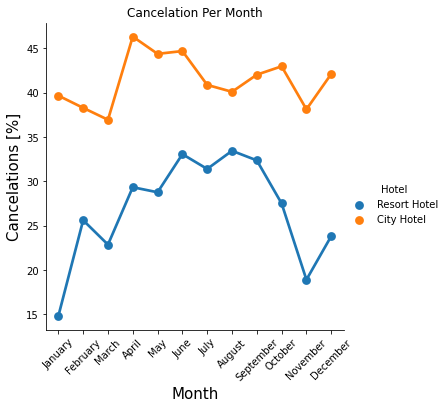

In [54]:
rh_book_per_month = df.loc[(df['Hotel']=='Resort Hotel')].groupby('ArrivalDateMonth')['Hotel'].count()
rh_cancel_per_month = df.loc[(df['Hotel']=='Resort Hotel')].groupby('ArrivalDateMonth')['IsCanceled'].sum()

ch_book_per_month = df.loc[(df['Hotel']=='City Hotel')].groupby('ArrivalDateMonth')['Hotel'].count()
ch_cancel_per_month = df.loc[(df['Hotel']=='City Hotel')].groupby('ArrivalDateMonth')['IsCanceled'].sum()

rh_cancel_data = pd.DataFrame({'Hotel':'Resort Hotel',
                               'Month':list(rh_book_per_month.index),
                               'Booking':list(rh_book_per_month.values),
                               'Cancelation':list(rh_cancel_per_month)})

ch_cancel_data = pd.DataFrame({'Hotel':'City Hotel',
                               'Month':list(ch_book_per_month.index),
                               'Booking':list(ch_book_per_month.values),
                               'Cancelation':list(ch_cancel_per_month)})

full_cancel_data = pd.concat([rh_cancel_data, ch_cancel_data], ignore_index=True)
full_cancel_data['cancel_percent'] = full_cancel_data['Cancelation'] / full_cancel_data['Booking'] * 100

month_list = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data['Month'] = pd.Categorical(full_cancel_data['Month'], categories=month_list, ordered=True)

plt.figure(figsize=(60,8))
sns.catplot(x = 'Month', y = 'cancel_percent', hue = 'Hotel', kind = 'point', data = full_cancel_data).set(title = 'Cancelation Per Month')
plt.xticks(rotation=45)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Cancelations [%]", fontsize=15)
plt.show()

[Text(0.5, 1.0, &#39;Different Customer Cancellation&#39;)]

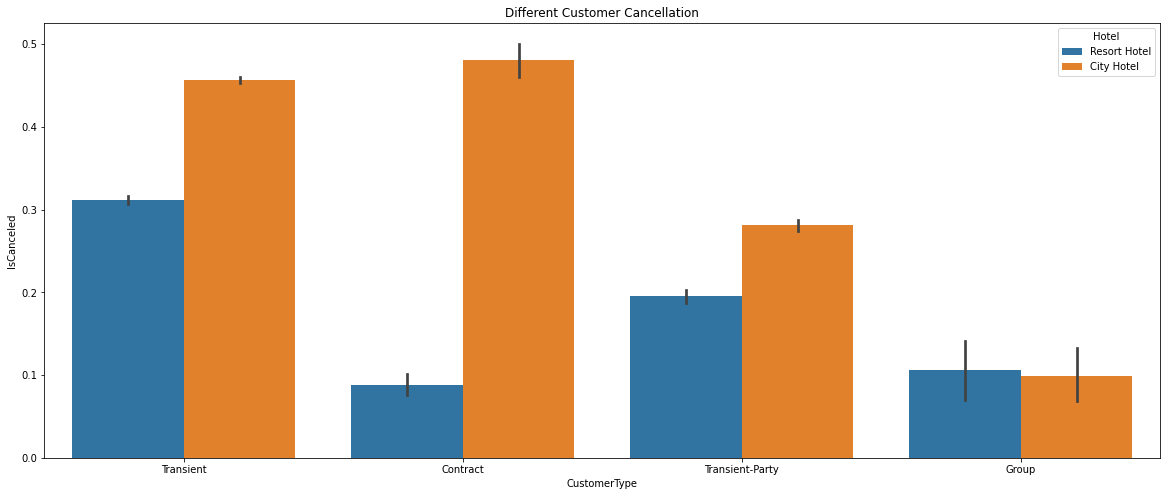

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(x="CustomerType", y="IsCanceled", hue='Hotel', data=df).set(title='Different Customer Cancellation')

In [10]:
country_data = pd.DataFrame(df.loc[df['IsCanceled'] == 0]['Country'].value_counts())

country_data.rename(columns={'Country':'Number of Guests'}, inplace=True)
total_guests = country_data['Number of Guests'].sum()
country_data['Guests i %'] = round(country_data['Number of Guests']/total_guests*100, 2)
country_data['Country'] = country_data.index

fig = px.pie(country_data,
             values='Number of Guests',
             names='Country',
             title='Country of Guests',
             template='seaborn')
        
fig.update_traces(textposition = 'inside', textinfo='value+percent+label')

fig.show()